/var/folders/vq/wcv9l2jd4hd5287qdhm073800000gp/T/ipykernel_71940/1345713030.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(unique_groups))  # get a color map from matplotlib


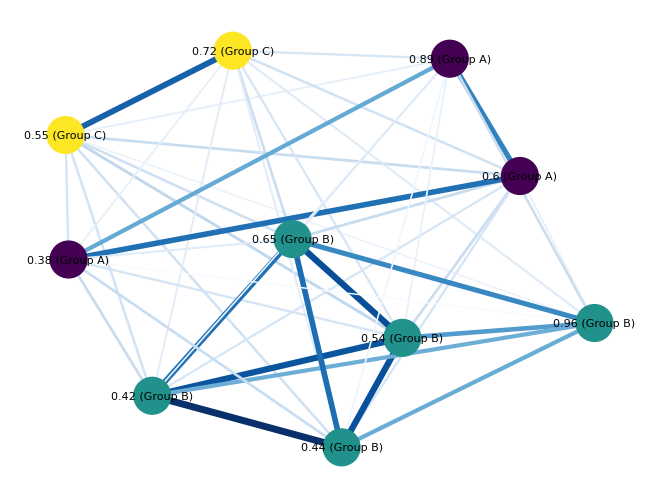

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a sample dataset
# Assume each data point has a 'value' (continuous) and 'group' (discrete)
np.random.seed(0)
num_points = 10
data = {
    'value': np.random.rand(num_points),
    'group': np.random.choice(['A', 'B', 'C'], num_points)
}

# Step 2: Create a graph
G = nx.Graph()

# Adding nodes with attributes
for i in range(num_points):
    G.add_node(i, value=round(data['value'][i], 2), group=data['group'][i])  # Rounded for better display

# Step 3: Add edges with weights
# Edge weights depend on both 'value' difference and whether nodes share the same 'group'
for i in range(num_points):
    for j in range(i + 1, num_points):
        weight = 1 / (1 + abs(data['value'][i] - data['value'][j]))  # weight based on 'value' difference
        if data['group'][i] == data['group'][j]:
            weight *= 2  # Increase weight if the same group
        G.add_edge(i, j, weight=weight)

# Step 4: Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

# Create a color map
unique_groups = list(set(data['group']))  # get unique groups
color_map = plt.cm.get_cmap('viridis', len(unique_groups))  # get a color map from matplotlib

# Map groups to colors
group_to_color = {group: color_map(i) for i, group in enumerate(unique_groups)}

# Get node colors from their groups
node_colors = [group_to_color[G.nodes[i]['group']] for i in G.nodes()]

# Get edges and their weights
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]

# Normalize weights for edge coloring and width scaling

max_weight = max(weights)
min_weight = min(weights)
weights_normalized = [(weight - min_weight) / (max_weight - min_weight) for weight in weights]  # Normalize to [0, 1]

# Define edge width range: Example 1 to 5
min_width = 1
max_width = 5
edge_widths = [min_width + (max_width - min_width) * weight for weight in weights_normalized]

nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=700,
        edge_color=weights, width=edge_widths, edge_cmap=plt.cm.Blues)


# Custom labels with 'value' and 'group'
labels = {i: f"{G.nodes[i]['value']} (Group {G.nodes[i]['group']})" for i in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)

# Show plot
plt.show()



In [20]:
# Compute the weighted clustering coefficient for each node
clustering_coeffs = nx.clustering(G, weight='weight')

# Print the clustering coefficients
for node, coeff in clustering_coeffs.items():
    print(f"Node {node}: Clustering Coefficient = {coeff:.3f}")

Node 0: Clustering Coefficient = 0.495
Node 1: Clustering Coefficient = 0.484
Node 2: Clustering Coefficient = 0.516
Node 3: Clustering Coefficient = 0.574
Node 4: Clustering Coefficient = 0.561
Node 5: Clustering Coefficient = 0.570
Node 6: Clustering Coefficient = 0.563
Node 7: Clustering Coefficient = 0.480
Node 8: Clustering Coefficient = 0.518
Node 9: Clustering Coefficient = 0.497
